# Building a Machine Learning Pipeline 
_Author: Zeth De Luna &mdash; September 14, 2020_

In this project, we'll be implementing the machine learning Linear Regression model to predict the values of houses in the housing market. To train our model, we'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can read more about the data [here](https://doi.org/10.1080/10691898.2011.11889627) and the data descriptions [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

## Building a Base
Let's start this project by setting up a pipeline of functions that will let us quickly iterate on different models:

$$\hspace{0.8cm} \textrm{Transform Features} \hspace{0.8cm} \longrightarrow \hspace{0.8cm} \textrm{Select Features} \hspace{0.8cm} \longrightarrow \hspace{0.8cm}
\textrm{Train and Test}$$

We'll create three functions that we can improve/update when needed:
* `transform_features`: for now, just returns a training data set generated from the `AmesHousingtsv.tsv` file
* `select_features()`: for now, just returns the `Gr Liv Area` (Above ground living area in square feet) and `SalePrice` columns from the training set
* `train_and_test()`: for now,
    * assigns first 1460 rows from the data to `train` and the remainder of the rows to `test`
    * trains a model using all numerical columns except `SalePrice`, returned from `select_features()
    * tests the model on the test set and returns the root mean squared error (RMSE)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# read the data
housing_data = pd.read_csv('AmesHousingtsv.tsv', sep='\t')

In [3]:
# initiate transform_features function
def transform_features(df):
    trans_data = df.copy()
    return trans_data

In [4]:
# initiate select_features function
def select_features(df):
    select_cols = ['Gr Liv Area', 'SalePrice']
    return df[select_cols]

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# initiate train_and_test function
def train_and_test(df):
    # generate train and test sets for the model
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    features = df.columns.drop('SalePrice')
    
    # initiate model and train with the "train" data
    model = LinearRegression()
    model.fit(train[[features]], train['SalePrice'])
    
    # test the model and calculate RMSE value
    predictions = model.predict(test[[features]])
    mse = mean_squared_error(test['SalePrice'], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

## Feature Engineering
Here, we'll begin developing our `transform_features()` function so that it actually does something. The goal of this function is to:
* remove features that we don't want to use in the model, just based on the number of missing values or data leakage
* transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc.)
* create new features by combining other features

First, we'll drop any column with over 25% missing values or unusable data. Next, for numeric columns with less than 5% missing values, we'll fill those missing values in with the most popular value in each column.

For the data transformations, we'll need to familiarize ourselves with the [data documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt) to determine what transformations are necessary.

In [6]:
housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Unusable Data
First, we'll check if any column has all distinct values. This could indicate that those columns have nominal data that can't usefully be transformed to a `category` type that we could use for machine learning. We'll drop these columns.

In [7]:
# copy of the housing_data dataframe
hd = housing_data.copy()

# get columns with all unique values
unusable = []
for col in housing_data:
    if len(housing_data[col].unique()) == housing_data.shape[0]:
        unusable.append(col)
        
print('Unusable Columns to Drop:\n{}'.format(unusable))
hd.drop(columns=unusable, inplace=True)

Unusable Columns to Drop:
['Order', 'PID']


Next, we'll drop any column that has over 25% missing values.

In [8]:
# count missing values for each column
missing_values = hd.isnull().sum()

# drop columns with over 25% missing values
over_25 = missing_values[missing_values > (hd.shape[0] * 0.25)]
hd.drop(columns=over_25.index, inplace=True)

### Numerical Data
Now, we'll find the columns that are numeric and have less than 5% missing values. We'll fill those missing values with the most popular value in each column.

In [9]:
# list of missing value count in numerical columns
missing_num = (hd.select_dtypes(include=['int', 'float'])
                   .isnull().sum()
              )
# fill missing values of columns missing under 5% of values
under_5 = missing_num[(missing_num < (hd.shape[0] * 0.05)) &
                      (missing_num > 0)]
modes = hd[under_5.index].mode().to_dict(orient='records')[0]
hd.fillna(modes, inplace=True)

In [10]:
hd.select_dtypes(include=['int', 'float']).isnull().sum()

MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area         0
BsmtFin SF 1         0
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       0
Bsmt Half Bath       0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

We still have missing values in the `Lot Frontage` and `Garage Yr Blt` columns. 

The data documentation states that `Lot Frontage` values give the linear feet of street connected to the property. So, it should be safe to assume that if a house has a missing value in this column, it means that there is `0` feet of street connected to the property. Let's replace those missing values with `0`.

In [11]:
hd['Lot Frontage'].fillna(0, inplace=True)

By looking at the documentation for the `Garage Yr Blt` and `Garage Type` columns, we learned that the missing values in `Garage Yr Blt` are resulting from the fact that those houses do not have a garage. Arguably, someone looking to buy a house with a garage is more concerned with the fact that it has a garage than with when the garage was added (if it wasn't already there when the house was built). So, we can drop the `Garage Yr Blt` column.

In [12]:
hd.drop(columns=['Garage Yr Blt'], inplace=True)

In [13]:
hd.select_dtypes(include=['int', 'float']).isnull().sum()

MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

We've gotten rid of all of the missing values, but we can still improve the numerical representation for some of these columns. The `Year Built`, `Year Remod/Add` and `Yr Sold` columns don't do a very good job at capturing the actual age and usage of the house. For example, a house built in 1960, remodeled in 1980, and sold in 2000 is really in a condition that a 20-year-old house would be in, not a 40-year-old house (assuming the house went through an intensive remodeling in 1980). We can create more representative features like `Years Before Sale` and `Years Since Remod` to better capture the age of the house.

In [14]:
# create new columns for "Years Before Sale" and "Years Since Remod"
hd['Years Before Sale'] = hd['Yr Sold'] - hd['Year Built']
hd['Years Since Remod'] = hd['Yr Sold'] - hd['Year Remod/Add']

In [15]:
# since we subtracted, double check to see if we got any negative values
hd[hd['Years Before Sale'] < 0]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Years Before Sale,Years Since Remod
2180,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Attchd,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,17000,10,2007,New,Partial,183850,-1,-2


In [16]:
hd[hd['Years Since Remod'] < 0]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Years Before Sale,Years Since Remod
1702,60,RL,134.0,16659,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1582.0,1582.0,GasA,Ex,Y,SBrkr,1582,570,0,2152,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Detchd,Unf,2.0,728.0,TA,TA,Y,0,368,0,0,0,0,0,6,2007,New,Partial,260116,0,-1
2180,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Attchd,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,17000,10,2007,New,Partial,183850,-1,-2
2181,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,BuiltIn,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750,0,-1


In [17]:
# drop the columns with negative values
hd.drop(hd[hd['Years Since Remod'] < 0].index, axis=0, inplace=True)

We no longer need the original year columns, so we can drop `Year Built` and `Year Remod/Add`. 

We also want to get rid of columns that could leak data about the final sale. These columns include: `Yr Sold`, `Mo Sold`, `Sale Condition`, and `Sale Type`.

In [18]:
# drop year columns and leaky columns
drop_cols = ['Year Built', 'Year Remod/Add', 'Yr Sold',
           'Mo Sold', 'Sale Condition', 'Sale Type']
hd.drop(columns=drop_cols, inplace=True)

### Categorical Data
Now that we've cleaned the numerical data, let's figure out which columns in the dataframe should be converted to the categorical data type. All columns with nominal variables are candidates for being converted to categorical, but we should consider the following:
* If a categorical column has hundreds of unique values (or categories), should we keep it? When we dummy code this column, hundreds of columns will need to be added back to the data frame. For now, let's set our cut-off number at 10 unique categories per column.
* Which categorical columns have a few unique values but more than 95% of the values in the column belong to a specific category? This would be similar to a low variance numerical feature (no variability in the data for the model to capture).
* Which columns are currently numerical but need to be encoded as categorical instead?

First, let's figure out which columns are meant to be categorical. Then, we'll get rid of all the columns that have a number of categories above our cut-off of 10 categories.

In [19]:
# view numerical columns
list(hd.select_dtypes(include=['int', 'float']).columns)

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'SalePrice',
 'Years Before Sale',
 'Years Since Remod']

From the documentation, we found that the following numerical columns should actually be categorical instead:
* `MS SubClass`: Identifies the type of dwelling involved in the sale
* `Overall Qual`: Rates the overall material and finish of the house
* `Overall Cond`: Rates the overall condition of the house

Let's add these columns to a list containing the rest of the columns that are meant to be categorical. Then, we'll drop any column that has a number of categories that doesn't meet our cut-off value of 10 categories.

In [20]:
# add "numerical" columns to nominal columns
nom_features = list(hd.select_dtypes(include=['object']).columns)
nom_features.extend(['MS SubClass', 'Overall Qual', 'Overall Cond'])

# remove columns that have over 10 categories
for col in nom_features:
    cat_count = len(hd[col].value_counts())
    if cat_count > 10:
        nom_features.remove(col)
        hd.drop(col, axis=1, inplace=True)

Next, we'll find out which columns have a low variability (low variability leads to bad results from the machine learning model) and drop those columns.

In [21]:
# remove any column that has over 95% of values under one category
for col in nom_features:
    total_val = hd.shape[0]
    max_cat = max(hd[col].value_counts())
    if (max_cat / total_val) >= 0.95:
        nom_features.remove(col)
        hd.drop(col, axis=1, inplace=True)

Finally, we'll convert these columns into a categorical type and add their dummy columns into the dataframe.

In [22]:
# convert nom_features columns to categorical
hd[nom_features] = hd[nom_features].astype('category')

# create dummy columns and add back to the dataframe
hd = pd.concat([hd, 
                pd.get_dummies(hd.select_dtypes(include=['category']))],
                axis=1
              )
# we can drop the nom_features columns since we have the dummies
hd.drop(nom_features, axis=1, inplace=True)

### Updating the `transform_features()` Function
Now that we understand our requirements for this project's feature engineering, let's update the `transform_features()` function. Here's the outline:
* Get rid of data that we can't use in machine learning algorithms
    * meaningless data
    * data with over 25% missing values
* Handle missing values in numerical columns
    * if column has less than 5% missing values, fill those missing values with the most popular value in the column
    * fill `Lot Frontage` missing values with `0`
    * drop `Garage Yr Blt` column
* Create new useful features from year columns
* Drop unecessary data and data that will leak information on the sale price
* Find columns that are meant to be categorical
    * filter out columns with more than 10 categories
    * filter out columns where over at least 95% of the values belong to one category
    * create dummy columns and remove old columns

In [23]:
def transform_features(df):
    clean_df = df.copy()
    
    #### CLEANING THE DATA ####
    # columns with all unique values are unusable
    unusable = []
    for col in clean_df:
        if len(clean_df[col].unique()) == clean_df.shape[0]:
            unusable.append(col)
        
    clean_df.drop(columns=unusable, inplace=True)
    
    # get rid of columns with over 25% missing values
    missing_values = clean_df.isnull().sum()
    over_25 = missing_values[missing_values > (clean_df.shape[0] * 0.25)]
    clean_df.drop(columns=over_25.index, inplace=True)
    
    # handle missing values in numerical columns
    missing_num = (clean_df.select_dtypes(include=['int', 'float'])
                       .isnull().sum()
                  )
    under_5 = missing_num[(missing_num < (clean_df.shape[0] * 0.05)) &
                          (missing_num > 0)]
    modes = clean_df[under_5.index].mode().to_dict(orient='records')[0]
    clean_df.fillna(modes, inplace=True)
    clean_df['Lot Frontage'].fillna(0, inplace=True)
    clean_df.drop(columns=['Garage Yr Blt'], inplace=True)
    
    # create new features
    clean_df['Years Before Sale'] = clean_df['Yr Sold'] - clean_df['Year Built']
    clean_df['Years Since Remod'] = clean_df['Yr Sold'] - clean_df['Year Remod/Add']
    clean_df.drop(clean_df[clean_df['Years Since Remod'] < 0].index, 
                  axis=0, inplace=True)
    
    # drop useless and leaky columns
    drop_cols = ['Year Built', 'Year Remod/Add', 'Yr Sold',
                 'Mo Sold', 'Sale Condition', 'Sale Type']
    clean_df.drop(columns=drop_cols, inplace=True)
    
    #### CREATING CATEGORICAL DUMMIES ####
    # add "numerical" columns to nominal columns
    nom_features = list(clean_df.select_dtypes(include=['object']).columns)
    nom_features.extend(['MS SubClass', 'Overall Qual', 'Overall Cond'])

    # remove columns that have over 10 categories
    for col in nom_features:
        cat_count = len(clean_df[col].value_counts())
        if cat_count > 10:
            nom_features.remove(col)
            clean_df.drop(col, axis=1, inplace=True)
    
    # remove any column that has over 95% of values under one category
    for col in nom_features:
        total_val = clean_df.shape[0]
        max_cat = max(clean_df[col].value_counts())
        if (max_cat / total_val) >= 0.95:
            nom_features.remove(col)
            clean_df.drop(col, axis=1, inplace=True)
            
    # convert nom_features columns to categorical
    clean_df[nom_features] = clean_df[nom_features].astype('category')

    # create dummy columns and add back to the dataframe
    clean_df = pd.concat([clean_df, 
                    pd.get_dummies(clean_df.select_dtypes(include=['category']))],
                    axis=1
                  )
    # we can drop the nom_features columns since we have the dummies
    clean_df.drop(nom_features, axis=1, inplace=True)
    
    return clean_df

## Feature Selection
To see which features might be good indicators for the `SalePrice`, we can generate a correlation heatmap of the features in the training data set.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:>

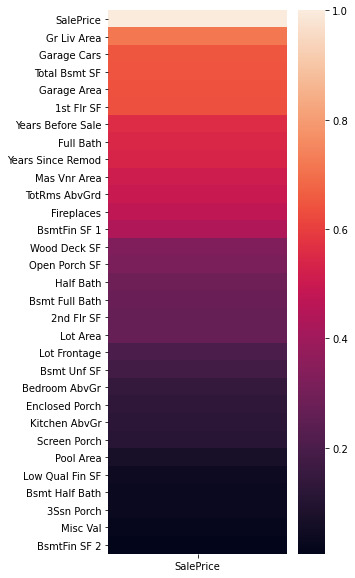

In [24]:
import seaborn as sns

# isolate numerical columns in dataframe
num_housing = (transform_features(housing_data)
                   .select_dtypes(include=['int', 'float'])
              )

# generate correlation matrix
num_hous_corr = num_housing.corr()
# SalePrice correlations
sp_corr = (num_hous_corr[['SalePrice']]
               .abs()
               .sort_values('SalePrice', ascending=False)
          )
# visualize correlations with SalePrice
plt.figure(figsize=(4,10))
sns.heatmap(sp_corr)

Let's get rid of the columns with less than 0.4 correlation with the `SalePrice`.

In [25]:
drop_cols = sp_corr[sp_corr < 0.4].dropna().index
num_housing.drop(drop_cols, axis=1, inplace=True)

In [26]:
num_housing.head()

,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice,Years Before Sale,Years Since Remod
0,112.0,639.0,1080.0,1656,1656,1,7,2,2.0,528.0,215000,50,50
1,0.0,468.0,882.0,896,896,1,5,0,1.0,730.0,105000,49,49
2,108.0,923.0,1329.0,1329,1329,1,6,0,1.0,312.0,172000,52,52
3,0.0,1065.0,2110.0,2110,2110,2,8,2,2.0,522.0,244000,42,42
4,0.0,791.0,928.0,928,1629,2,6,1,2.0,482.0,189900,13,12


In [27]:
df = transform_features(housing_data)
type(df.loc[0, 'MS Zoning_A (agr)'])

numpy.uint8

<AxesSubplot:>

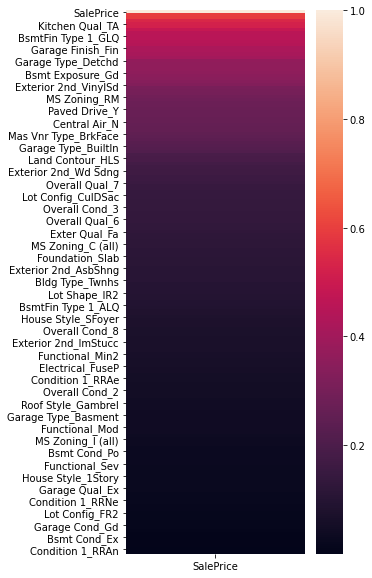

In [28]:
# isolate categorical dummies
cat_housing = (transform_features(housing_data)
                   .select_dtypes(include=['uint8'])
              )
# add SalePrice column
cat_housing['SalePrice'] = transform_features(housing_data)['SalePrice']

# generate correlation matrix
cat_corr = cat_housing.corr()

# SalePrice correlations
sp_corr = (cat_corr[['SalePrice']]
               .abs()
               .sort_values('SalePrice', ascending=False)
          )
# visualize correlations with SalePrice
plt.figure(figsize=(4,10))
sns.heatmap(sp_corr)

It seems like most of these columns have very little correlation with the sale price. Let's get rid of the columns that have less than 0.5 correlation with the `SalePrice`.

In [29]:
drop_cols = sp_corr[sp_corr < 0.5].dropna().index
cat_housing.drop(drop_cols, axis=1, inplace=True)

### Updating the `select_features()` Function
Now that we have established a method for selecting our features, let's update our `select_features()` function. Here's a brief outline of the function:
* Isolate numeric, non-categorical columns
    * generate a correlation matrix between the `SalePrice` column and the rest of the columns
    * select the features that have at least a 0.4 correlation with `SalePrice`
* Isolate categorical columns
    * generate a correlation matrix between the `SalePrice` column and the rest of the columns
    * select the features that have at least a 0.5 correlation with `SalePrice`

In [30]:
def select_features(df):
    #### FOR NUMERICAL, NON-CATEGORICAL FEATURES ####
    # isolate numerical columns in dataframe
    num_housing = df.select_dtypes(include=['int', 'float']).copy()
    
    # generate correlation matrix
    num_hous_corr = num_housing.corr()
    
    # isolate SalePrice correlations
    num_sp_corr = (num_hous_corr[['SalePrice']]
                       .abs()
                       .sort_values('SalePrice', ascending=False)
              )
    # drop columns with less than 0.4 correlation with SalePrice
    num_drop_cols = num_sp_corr[num_sp_corr < 0.4].dropna().index
    num_housing.drop(num_drop_cols, axis=1, inplace=True)
    
    # create list of features excluding SalePrice
    num_features = list(num_housing.columns.drop('SalePrice'))
    
    #### FOR CATEGORICAL FEATURES ####
    # isolate categorical features
    cat_housing = df.select_dtypes(include=['uint8']).copy()
    cat_housing['SalePrice'] = df['SalePrice']
    
    # generate correlation matrix
    cat_hous_corr = cat_housing.corr()
    
    # isolate SalePrice correlations
    cat_sp_corr = (cat_hous_corr[['SalePrice']]
                       .abs()
                       .sort_values('SalePrice', ascending=False)
                  )
    # drop columns with less than 0.5 correlation with SalePrice
    cat_drop_cols = cat_sp_corr[cat_sp_corr < 0.5].dropna().index
    cat_housing.drop(cat_drop_cols, axis=1, inplace=True)
    
    # create list of features excluding SalePrice
    cat_features = list(cat_housing.columns.drop('SalePrice'))
    
    #### FOR RETURN ####
    # combine num_features and cat_features
    features = num_features + cat_features
    
    return features

## Training and Testing
We've finally reached the end of the pipeline! When iterating on different features, using a simple validation is a good idea. Here, we'll be making our `train_and_test()` function more versatile by introducing a parameter `k` that controls the type of cross validation that occurs in the function. Here's an outline of the validation methods that will run with each `k`:
* `k = 0` (default): the function will perform holdout validation
    * Assign the first 1460 rows of the data to `train`.
    * Assign the rest of the data to `test`.
    * Train the Linear Regression model on `train` and test it on `test`.
    * Return the RMSE value.
* `k = 1`: the function will perform simple cross validation
    * Shuffle the ordering of the rows in the dataframe.
    * Assign the first 1460 rows to `fold_one`.
    * Assign the rest of the data to `fold_two`.
    * Train on `fold_one` and test on `fold_two`.
    * Train on `fold_two` and test on `fold_one`.
    * Return the average RMSE value.
* `k > 1`: the function will perform k-fold cross validation
    * Same as above, but more folds.
    * Return the average RMSE value.

In [31]:
from sklearn.model_selection import cross_val_score, KFold

def train_and_test(df, features, k=1):
    # instantiate Linear Regression Model
    model = LinearRegression()
    
    #### HOLDOUT VALIDATION ####
    if k == 1:
        # generate train and test sets for the model
        train = df.iloc[:1460]
        test = df.iloc[1460:]
    
        # initiate model and train with the "train" data
        model.fit(train[features], train['SalePrice'])
    
        # test the model and calculate RMSE value
        predictions = model.predict(test[features])
        mse = mean_squared_error(test['SalePrice'], predictions)
        rmse = np.sqrt(mse)
        
        return rmse
    
    #### CROSS VALIDATION ####
    if k >= 2:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            model.fit(train[features], train['SalePrice'])
            predictions = model.predict(test[features])
            mse = mean_squared_error(test['SalePrice'], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        avg_rmse = np.mean(rmse_values)
        
        return avg_rmse

## Using Our Functions
Now that we're done building our functions, let's run them a few times.

In [32]:
data = transform_features(housing_data)
feats = select_features(data)

for i in range(1, 9):
    rmse = train_and_test(data, feats, k=i)
    print('k = {}: {}'.format(i, rmse))

k = 1: 35486.106932733135
k = 2: 31757.119742563198
k = 3: 31742.966574507645
k = 4: 31475.06727290295
k = 5: 31531.125317712536
k = 6: 31654.55842021517
k = 7: 31390.454265400596
k = 8: 31315.544210874108


## Conclusions
In this project we built three functions that act as a pipline for a Linear Regression machine learning model:
1. `transform_features`: 
    * cleans data &mdash; remove unusable columns, fill or drop missing values, and convert columns to appropriate data types
    * feature engineering &mdash; create more useful features from the available features
2. `select_features`:
    * selects features based on correlations with `SalePrice`
        * for numerical features, we chose those with at least a 0.4 correlation
        * for categorical features, we chose those with at least a 0.5 correlation
3. `train_and_test`:
    * takes the resulting dataframe from `transform_features` and the resulting features from `select_features` and implements:
        * holdout validation if the `k` parameter is `1` (`k = 1` by default)
        * cross validation if `k > 1`
        
The use of this pipeline allows us to easily experiment with different values. For example, in `select_features()` we are able to choose more or less features by changing the correlation cut-off value. To further improve our machine learning pipeline, we could conduct such experiments and determine the parameters that would achieve the best predictions.